# Tarea 1_ Red neuronal Perceptrón multicapa Keras

Este trabajo es un clasificador de prendas de ropa en 10 clases.
Los resultados obtenidos fueron de:
* Exactitud en el entrenamiento: 0.9332000017166138 
* Pérdida en el entrenamiento: 0.17810234427452087
* Exactitud en la prueba: 0.8931000232696533 
* Pérdida en la prueba: 0.33242884278297424

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Esta tarea usa el set de datos de Fashion MNIST de más de 70,000 imágenes en 10 categorias. Las imágenes muestran artículos individuales de ropa a una resolucion de 28 por 28 pixeles.

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
fashion_mnist = load_data()

# Separando el conjunto de datos en entrenamiento y prueba 

Primero se separan los datos en conjuntos de entrenamiento y prueba con sus respectivas etiquetas.

In [ ]:
(x_train, y_train), (x_test, y_test)= fashion_mnist

Observamos que son 60k imágenes para el entrenamiento.

In [ ]:
x_train.shape

(60000, 28, 28)

Se grafica una de estas imágenes para corroborar que se trate de un artículo de ropa.

In [ ]:
imagendemo=x_train[0,:,:]

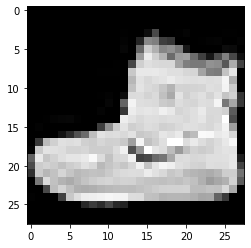

In [ ]:
plt.imshow(imagendemo,cmap='gray')

Posteriormente se estandarizan los valores de las imágenes a un rango de 0 a 1.

Nota 1: Estandarizando las imágenes, mejora el porcentaje de accuracy del 0.8485 al 0.9395 con 15 épocas.

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Se presentan las clases correspondientes y se almacenan en el diccionario label_dict{ }.

In [ ]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

In [ ]:
label_dict[y_train[0]]

'Ankle boot'

# ¡¡¡Suerte :D !!!

Dankeschön!

## Ajustando los datos

Se convierten las entradas bidimensionales a unidimensionales por medio del reshape, esto se podría realizar con una capa tipo "Flatten" pero desconocía si al agregar la capa ya no sería contemplada como una Red Vanilla jeje.

In [ ]:
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

El convertir la salida de etiquetas a un vector one_hot cambia la exactitud de 89.11% a 89.16% con 5 épocas, por lo que se hace el cambio.

In [ ]:
# Convertir el array de salidas a una codificación one_ hot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
# Cambiamos el y_train a una forma (numero de datos, etiqueta categorica)
y_train = y_train.reshape(len(y_train), 1)
# Y cambiamos a un vector one-hot
y_train_onehot = onehot_encoder.fit_transform(y_train)

# Cambiamos el y_test a una forma (numero de datos, etiqueta categorica)
y_test = y_test.reshape(len(y_test), 1)
# Y cambiamos a un vector one-hot
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

## Declarando la arquitectura con Keras

Ahora sí, la arquitectura de esta red son dos primeras capas densas de 128 neuronas y función de activación relu y una capa densa de salida de 10 neuronas puesto que queremos que clasifique entre 10 categorías distintas.

Nota 2: La función de activación de la última capa presentó mejoras al ser cambiada de 'None' (valor default si no es especificado) a 'softmax' (de 9.99% a 92.51%).

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(784,), activation= 'relu'),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
# Graficar la arquitectura de la red
model = model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Éstas son agregadas durante el paso de compilacion del modelo:

+ Loss function: Mide qué tan exacto es el modelo. Se busca minimizar su valor para dirigir el modelo en la dirección adecuada.
+ Optimizer: Cómo el modelo se actualiza basado en el set de datos que ve y la función de pérdida. Por default el factor de aprendizaje es de 0.001
+ Metrics: Métricas de validación, monitorean los pasos de entrenamiento y pruebas. El accuracy (exactitud), arroja la fración de entradas correctamente clasificadas.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Posteriormente se hace el entrenamiento para asociar las imágenes con sus respectivas etiquetas. Entre mayor sea la cantidad de épocas, mayor costo computacional requerirá pero en la mayoría de las veces el modelo se ajustará mejor a las entradas.

In [ ]:
model.fit(x_train, y=y_train_onehot, batch_size =100, epochs=15)

Epoch 1/15
600/600 [==============================] - 7s 10ms/step - loss: 0.5237 - accuracy: 0.8166
Epoch 2/15
600/600 [==============================] - 6s 9ms/step - loss: 0.3790 - accuracy: 0.8628
Epoch 3/15
600/600 [==============================] - 4s 7ms/step - loss: 0.3331 - accuracy: 0.8788
Epoch 4/15
600/600 [==============================] - 3s 6ms/step - loss: 0.3113 - accuracy: 0.8847
Epoch 5/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2936 - accuracy: 0.8919
Epoch 6/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2786 - accuracy: 0.8954
Epoch 7/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2665 - accuracy: 0.9003
Epoch 8/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2575 - accuracy: 0.9045
Epoch 9/15
600/600 [==============================] - 4s 6ms/step - loss: 0.2435 - accuracy: 0.9089
Epoch 10/15
600/600 [==============================] - 4s 7ms/step - loss: 0.2378 - accuracy: 0.909

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train_onehot, verbose=2)

print('\nExactitud en el entrenamiento:', train_acc, '\nPérdida en el entrenamiento:', train_loss, )

1875/1875 - 3s - loss: 0.1781 - accuracy: 0.9332 - 3s/epoch - 1ms/step

Exactitud en el entrenamiento: 0.9332000017166138 
Pérdida en el entrenamiento: 0.17810234427452087


## Pruebas y predicciones

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test_onehot, verbose=2)

print('\nExactitud en la prueba:', test_acc, '\nPérdida en la prueba:', test_loss, )

313/313 - 1s - loss: 0.3324 - accuracy: 0.8931 - 775ms/epoch - 2ms/step

Exactitud en la prueba: 0.8931000232696533 
Pérdida en la prueba: 0.33242884278297424


Finalmente se compara el modelo con los datos que no fueron utilizados para el entrenamiento, con la finalidad de valorar qué tan asertivo es el algoritmo de clasificación.

In [ ]:
predictions = model.predict(x_test)

La siguiente y última celda permite hacer pruebas con algún dato de posición "validación" y desplegar la comparativa entre el algoritmo programado y su valor real.

In [ ]:
validacion = 1313
predictions[validacion]
res_predictor = np.argmax(predictions[validacion])
res_real = y_test[validacion]
print('El predictor arroja una clase de tipo:', label_dict[res_predictor], ', la clase real es:', label_dict[int(res_real)], '.')

El predictor arroja una clase de tipo: Bag , la clase real es: Bag .
